<a href="https://colab.research.google.com/github/pradeep70/MNIST_Handwritten/blob/main/MNIST_Handwritten_KS_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



##Installing TensorFlow 2.x

In [1]:
# !pip install tensorflow

In [2]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.8.0


###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
Y_TRAIN = Y_train
Y_TEST = Y_test

In [5]:
X_TRAIN = X_train
X_TEST = X_test

In [6]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_TRAIN[1].shape

(28, 28)

###Data Preprocessing

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [9]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [11]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 4s 4ms/step - loss: 1.1013 - accuracy: 0.7473 - val_loss: 0.6540 - val_accuracy: 0.8630
Epoch 2/70
750/750 [==============================] - 3s 4ms/step - loss: 0.6052 - accuracy: 0.8574 - val_loss: 0.5060 - val_accuracy: 0.8768
Epoch 3/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5102 - accuracy: 0.8714 - val_loss: 0.4485 - val_accuracy: 0.8860
Epoch 4/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4643 - accuracy: 0.8788 - val_loss: 0.4167 - val_accuracy: 0.8915
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4361 - accuracy: 0.8842 - val_loss: 0.3960 - val_accuracy: 0.8958
Epoch 6/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4165 - accuracy: 0.8885 - val_loss: 0.3809 - val_accuracy: 0.8996
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4019 - accuracy: 0.8913 - val_loss: 0.3697 - val_accuracy: 0.9015
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


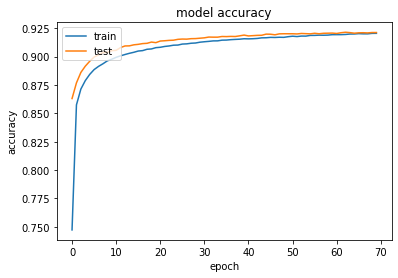

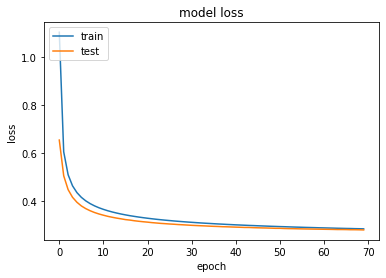

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9210
Test accuracy: 0.9210000038146973


In [15]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_0.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential'}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [17]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [18]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 1.0748 - accuracy: 0.7190 - val_loss: 0.4722 - val_accuracy: 0.8794
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4263 - accuracy: 0.8830 - val_loss: 0.3479 - val_accuracy: 0.9033
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3501 - accuracy: 0.9016 - val_loss: 0.3096 - val_accuracy: 0.9113
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3142 - accuracy: 0.9121 - val_loss: 0.2813 - val_accuracy: 0.9187
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2893 - accuracy: 0.9183 - val_loss: 0.2634 - val_accuracy: 0.9258
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2690 - accuracy: 0.9239 - val_loss: 0.2487 - val_accuracy: 0.9295
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2527 - accuracy: 0.9289 - val_loss: 0.2332 - val_accuracy: 0.9348

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


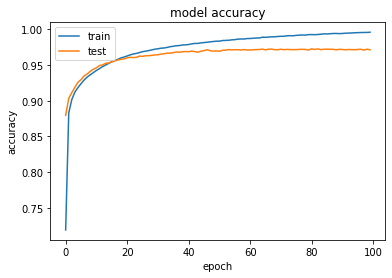

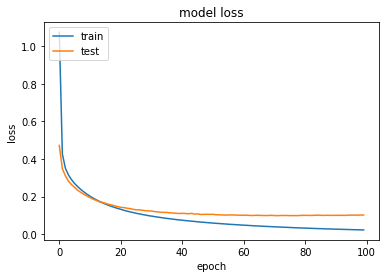

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9760
Test accuracy: 0.9760000109672546


In [22]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 64)                50240     
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 dense_layer_3 (Dense)       (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.0439366 , -0.01358505,  0.02604012, ...,  0.05257574,
          0.07178924, -0.06771435],
        [ 0.07615042,  0.05519675,  0.05633361, ..., -0.06396294,
         -0.00232749,  0.02000649],
        [-0.08300593,  0.07416897,  0.00012821, ..., -0.01762354,
          0.01365741, -0.04900998],
        ...,
        [ 0.02928962,  0.02548214, -0.02011524, ...,  0.0680365 ,
          0.01545411,  0.0730627 ],
        [ 0.02099861,  0.0655308 ,  0.0824902 , ..., -0.03715171,
         -0.03460784, -0.06306892],
        [-0.00831614,  0.06800667, -0.00603552, ..., -0.0424686 ,
         -0.05044584,  0.0282947 ]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.11290894, -0.00061504,  0.10314268, -0.07086683,  0.0335181 ,
         0.00277734,  0.04646972, -0.11670629,  0.17437561,  0.1428461 ,
         0.00433892,  0.06861804,  0.00218816,  0.03524669,  0.0377

In [24]:
model_1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_i

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [25]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [26]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 1.3193 - accuracy: 0.5820 - val_loss: 0.5216 - val_accuracy: 0.8719
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6434 - accuracy: 0.8026 - val_loss: 0.3709 - val_accuracy: 0.9003
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5165 - accuracy: 0.8452 - val_loss: 0.3168 - val_accuracy: 0.9113
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4495 - accuracy: 0.8638 - val_loss: 0.2844 - val_accuracy: 0.9187
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4084 - accuracy: 0.8802 - val_loss: 0.2617 - val_accuracy: 0.9252
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3737 - accuracy: 0.8887 - val_loss: 0.2441 - val_accuracy: 0.9295
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3480 - accuracy: 0.8969 - val_loss: 0.2292 - val_accuracy: 0.9333
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


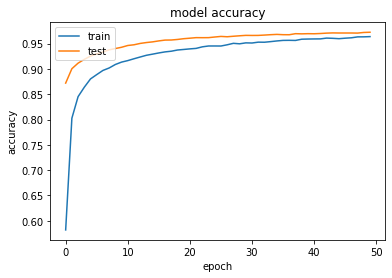

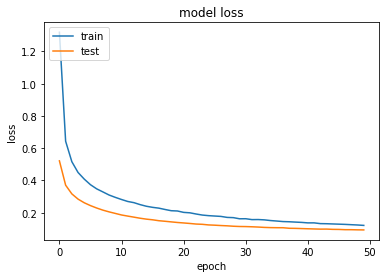

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9724
Test accuracy: 0.9724000096321106


In [30]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.05491399,  0.00835142, -0.05553565, ...,  0.01808607,
         -0.0335645 , -0.07739384],
        [-0.0571605 , -0.0234894 , -0.04046822, ...,  0.01382136,
          0.05327705, -0.01990878],
        [ 0.05546544, -0.04489479,  0.02129427, ..., -0.00508568,
         -0.030331  ,  0.02494337],
        ...,
        [ 0.00433352, -0.04696563, -0.03598544, ..., -0.04279574,
         -0.00895362,  0.02079724],
        [-0.00690822,  0.07212742,  0.03941049, ..., -0.02203911,
         -0.02489011, -0.06437329],
        [-0.05766602,  0.04314844, -0.05966803, ..., -0.07419595,
          0.03125278,  0.00805564]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.0401701 , -0.03466801, -0.13738944,  0.13126257, -0.01282593,
         0.05392066,  0.03925904,  0.01476808,  0.07766918, -0.05324611,
         0.01714044, -0.08424466, -0.00122497,  0.08469204, -0.01

In [32]:
model_2.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrain

###Improved Model 3: Changing the Optimizer - Adam

In [33]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [34]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6849 - accuracy: 0.7867 - val_loss: 0.2473 - val_accuracy: 0.9271
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8996 - val_loss: 0.1903 - val_accuracy: 0.9438
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2839 - accuracy: 0.9172 - val_loss: 0.1608 - val_accuracy: 0.9545
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2487 - accuracy: 0.9272 - val_loss: 0.1449 - val_accuracy: 0.9581
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2237 - accuracy: 0.9353 - val_loss: 0.1336 - val_accuracy: 0.9602
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2018 - accuracy: 0.9405 - val_loss: 0.1259 - val_accuracy: 0.9648
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1918 - accuracy: 0.9433 - val_loss: 0.1253 - val_accuracy: 0.9624
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


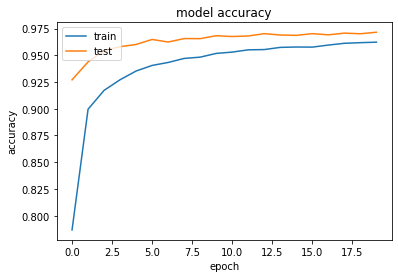

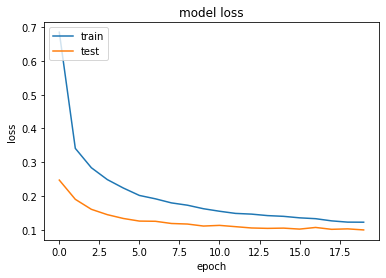

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9703
Test accuracy: 0.970300018787384


In [38]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.00445724, -0.02769434,  0.02520566, ...,  0.01480749,
         -0.06948204,  0.01616622],
        [ 0.06711484, -0.02076608, -0.05798634, ...,  0.05738296,
         -0.02614368,  0.08192787],
        [ 0.00721902,  0.07878936,  0.01054169, ...,  0.06753362,
         -0.01510632,  0.04625262],
        ...,
        [ 0.06535458,  0.04065837, -0.02355495, ...,  0.03604968,
          0.0583391 ,  0.08289886],
        [ 0.0787627 , -0.04482208, -0.04462378, ...,  0.04578128,
         -0.07759903,  0.07203952],
        [-0.02095975, -0.0318834 , -0.00204095, ...,  0.07527529,
         -0.05943555, -0.04661478]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.12649116, -0.36498138, -0.01612254, -0.04372803, -0.20476694,
         0.18878518,  0.02989443,  0.01644074,  0.12923627, -0.05764244,
         0.12017815,  0.11416829, -0.12790214, -0.15748693,  0.0164

In [40]:
model_3.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_2',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrai

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [41]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [42]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 2s 4ms/step - loss: 0.3064 - accuracy: 0.9069 - val_loss: 0.1263 - val_accuracy: 0.9609
Epoch 2/31
375/375 [==============================] - 1s 4ms/step - loss: 0.1281 - accuracy: 0.9603 - val_loss: 0.0953 - val_accuracy: 0.9714
Epoch 3/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9710 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 4/31
375/375 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9779 - val_loss: 0.0844 - val_accuracy: 0.9748
Epoch 5/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9801 - val_loss: 0.0799 - val_accuracy: 0.9764
Epoch 6/31
375/375 [==============================] - 1s 4ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0780 - val_accuracy: 0.9786
Epoch 7/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.0806 - val_accuracy: 0.9783
Epoch 

In [44]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9814
Test accuracy: 0.9814000129699707


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


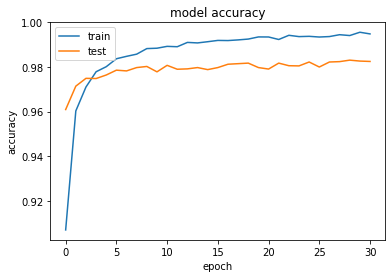

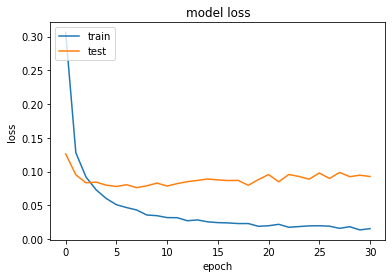

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.02269088, -0.03680216,  0.00178924, ..., -0.05126089,
          0.01291281,  0.06546023],
        [ 0.02258228, -0.0414249 ,  0.02965572, ..., -0.00489943,
          0.05229259,  0.05720194],
        [ 0.03303387,  0.05040899,  0.02110451, ...,  0.01792431,
         -0.00935897, -0.00768439],
        ...,
        [ 0.04284172, -0.01765893,  0.01390828, ...,  0.04873253,
         -0.05337393,  0.03448269],
        [ 0.02005247,  0.02045907,  0.05216556, ...,  0.04378284,
         -0.01440077,  0.0258687 ],
        [-0.05358176,  0.05727485,  0.05082672, ..., -0.00732849,
          0.00561627,  0.01390379]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-2.17996359e-01,  4.16459106e-02, -3.02310847e-02, -1.56562343e-01,
        -2.80673858e-02, -1.78172085e-02, -7.09844902e-02,  1.88166704e-02,
         1.22457147e-02, -9.21013020e-03, -8.10533389e-02, 

In [48]:
model_4.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_4',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 5: Manipulating the batch size

In [49]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [50]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 3s 3ms/step - loss: 0.2694 - accuracy: 0.9187 - val_loss: 0.1224 - val_accuracy: 0.9639
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.1240 - accuracy: 0.9618 - val_loss: 0.0960 - val_accuracy: 0.9701
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0948 - accuracy: 0.9700 - val_loss: 0.0939 - val_accuracy: 0.9731
Epoch 4/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0748 - accuracy: 0.9761 - val_loss: 0.0839 - val_accuracy: 0.9750
Epoch 5/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 0.0864 - val_accuracy: 0.9762
Epoch 6/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0926 - val_accuracy: 0.9748
Epoch 7/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0522 - accuracy: 0.9832 - val_loss: 0.0873 - val_accuracy: 0.9772
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


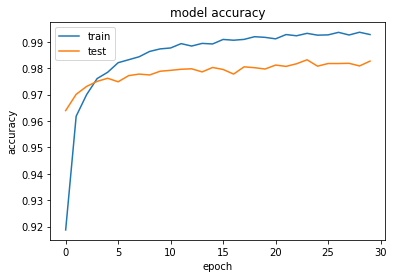

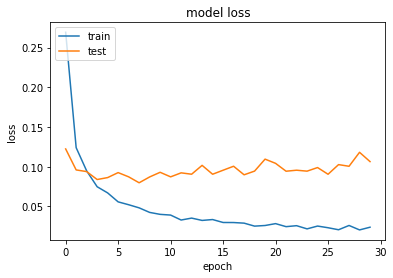

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9838
Test accuracy: 0.9837999939918518


In [54]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.04394645, -0.00300068,  0.03533324, ..., -0.05539639,
         -0.00216042, -0.05519775],
        [ 0.0035708 , -0.03593446, -0.01844036, ...,  0.06450027,
         -0.02739702,  0.06425045],
        [ 0.06448463, -0.00565382,  0.01442143, ...,  0.0378619 ,
          0.05456398, -0.0087635 ],
        ...,
        [-0.01047152,  0.00724646,  0.00666467, ...,  0.06741636,
         -0.06731737,  0.00345878],
        [-0.04674   ,  0.05331641,  0.02680551, ..., -0.00182177,
         -0.02559124,  0.05833456],
        [-0.00320034,  0.02516536, -0.06739771, ..., -0.02477057,
         -0.03667587,  0.03647651]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.15286468, -0.15156125, -0.05559691, -0.06945089, -0.03812766,
        -0.01923127, -0.22458388, -0.05117761, -0.15048085,  0.04756449,
        -0.18401699, -0.19934101, -0.08882299, -0.23529783,  0.04

In [56]:
model_5.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 6: Adding Another Hidden Layer to the Model

In [57]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [58]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2959 - accuracy: 0.9088 - val_loss: 0.1231 - val_accuracy: 0.9632
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1408 - accuracy: 0.9567 - val_loss: 0.1028 - val_accuracy: 0.9701
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.1188 - val_accuracy: 0.9675
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0922 - accuracy: 0.9719 - val_loss: 0.0937 - val_accuracy: 0.9747
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0810 - accuracy: 0.9753 - val_loss: 0.0913 - val_accuracy: 0.9750
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0872 - val_accuracy: 0.9756
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0857 - val_accuracy: 0.9781
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


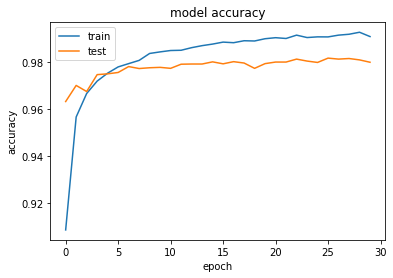

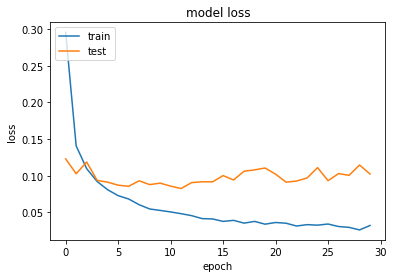

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9832
Test accuracy: 0.9832000136375427


In [62]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_layer_4 (Dense)       (None, 10)               

In [63]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.03635458, -0.01635034,  0.03847137, ..., -0.04061801,
          0.0234687 ,  0.02439713],
        [ 0.02065951, -0.01286316, -0.00175539, ..., -0.01917565,
          0.03148766, -0.02076732],
        [ 0.03951145,  0.03477961,  0.06215622, ..., -0.03503507,
          0.03889064, -0.00016738],
        ...,
        [ 0.02968391, -0.06554988,  0.012771  , ..., -0.06185226,
         -0.03608841, -0.05654648],
        [-0.03618954, -0.04054804, -0.03336007, ...,  0.05110269,
         -0.0544772 ,  0.03032526],
        [ 0.00261587,  0.01046085, -0.03183193, ...,  0.06387259,
         -0.04517721,  0.03953046]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.03149642, -0.2513793 ,  0.02370087, -0.05583332, -0.0880777 ,
        -0.07890586, -0.03762795, -0.07068086, -0.0965941 , -0.1819124 ,
        -0.10671455, -0.09971683, -0.02988418, -0.08001315,  0.06

In [64]:
model_6.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

#**Prediction**

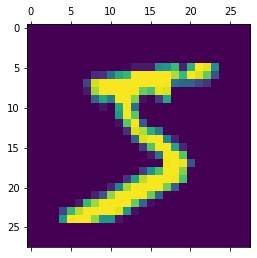

In [65]:
plt.matshow(X_TRAIN[0])

In [66]:
Y_TRAIN[0]

5

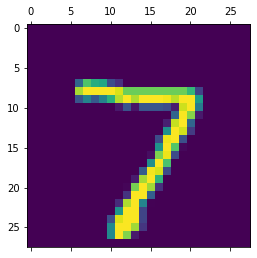

In [67]:
plt.matshow(X_TEST[0])

In [68]:
y_predicted_0 = model_0.predict(X_test)
y_predicted_0[0]

array([3.8873721e-05, 5.8404854e-09, 1.2400930e-04, 3.7659314e-03,
       2.0158373e-06, 2.6046715e-05, 2.5431392e-08, 9.9549013e-01,
       3.6729409e-05, 5.1627541e-04], dtype=float32)

In [69]:
import numpy as np
np.argmax(y_predicted_0[0])

7

## Prediction with different models

In [70]:
y_predicted_1 = model_1.predict(X_test)
y_predicted_1[0]

array([1.3178901e-07, 1.4365168e-07, 1.3756738e-05, 6.5367966e-04,
       1.3573870e-09, 2.1093250e-05, 1.6532313e-09, 9.9929953e-01,
       1.0892692e-05, 8.2277057e-07], dtype=float32)

In [71]:
np.argmax(y_predicted_1[0])

7

In [76]:
y_predicted_2 = model_2.predict(X_test)
y_predicted_2[0]

array([1.92023393e-07, 9.26906012e-07, 1.08590386e-04, 1.29008142e-04,
       7.94216337e-09, 4.49602489e-08, 7.34405037e-10, 9.99745429e-01,
       3.64416692e-08, 1.58640123e-05], dtype=float32)

In [77]:
np.argmax(y_predicted_2[0])

7

In [78]:
y_predicted_3 = model_3.predict(X_test)
y_predicted_3[0]

array([8.1813456e-10, 2.9387023e-08, 1.7531043e-05, 4.0925112e-05,
       4.0092435e-12, 1.8078905e-08, 2.4397918e-14, 9.9994063e-01,
       3.1711662e-09, 8.3068755e-07], dtype=float32)

In [79]:
np.argmax(y_predicted_3[0])

7

In [80]:
y_predicted_4 = model_4.predict(X_test)
y_predicted_4[0]

array([3.0214883e-18, 2.8065308e-13, 1.7325245e-15, 7.1935384e-14,
       1.0823781e-19, 3.7707152e-19, 3.8438881e-24, 1.0000000e+00,
       1.0482487e-19, 1.3413967e-10], dtype=float32)

In [75]:
y_predicted_1 = model_1.predict(X_test)
y_predicted_1[0]

array([1.3178901e-07, 1.4365168e-07, 1.3756738e-05, 6.5367966e-04,
       1.3573870e-09, 2.1093250e-05, 1.6532313e-09, 9.9929953e-01,
       1.0892692e-05, 8.2277057e-07], dtype=float32)

In [81]:
np.argmax(y_predicted_4[0])

7

In [82]:
y_predicted_5 = model_5.predict(X_test)
y_predicted_5[0]

array([8.7795575e-19, 1.0354136e-16, 3.5708368e-16, 9.1703754e-12,
       5.6789842e-19, 1.9245665e-16, 1.4097495e-27, 1.0000000e+00,
       3.3681301e-18, 2.2012647e-11], dtype=float32)

In [83]:
np.argmax(y_predicted_5[0])

7

In [84]:
y_predicted_6 = model_6.predict(X_test)
y_predicted_6[0]

array([2.7726009e-24, 5.2450028e-12, 7.6173378e-13, 2.1584905e-15,
       1.1744959e-15, 1.0261988e-19, 5.9278266e-33, 9.9999988e-01,
       1.4525766e-18, 1.6521686e-07], dtype=float32)

In [85]:
np.argmax(y_predicted_6[0])

7